In [9]:
import numpy as np
import matplotlib.pyplot as plt

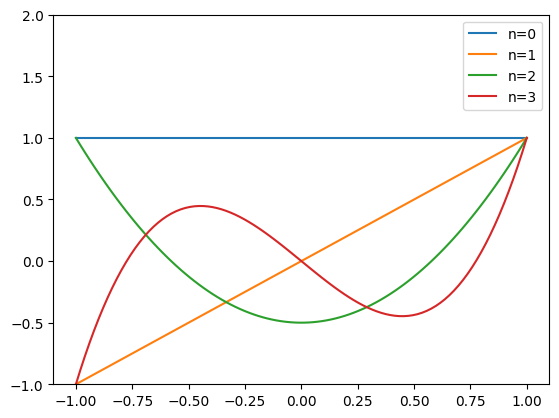

In [9]:
# legendre
def P(n: int, x: np.ndarray) -> np.ndarray:
    if n == 0:
        return np.full(len(x), 1)  # 回傳全部都是1的array
    elif n == 1:
        return x  # 回傳x
    else:
        return (((2 * n) - 1) * x *
                P(n - 1, x) - (n - 1) *
                P(n - 2, x)) / n  # 回傳遞迴後的結果


x = np.linspace(-1, 1, 100)  # 為從-1~1中有100個數的陣列
lim = (0, 4)  # 要顯示的n的範圍
splits = False  # 是否要將圖分開顯示
for n in range(*lim):
    plt.ylim(-1, 2)  # 設定邊界
    y = P(n, x)  # 以x計算y
    plt.plot(x, y, label=f"n={n}")  # 畫到畫布上
    plt.legend()  # 圖例
    if splits:
        plt.show()  # 給使用者看
if not splits:
    plt.ylim(-1, 2)  # 設定邊界
    plt.show()  # 給使用者看

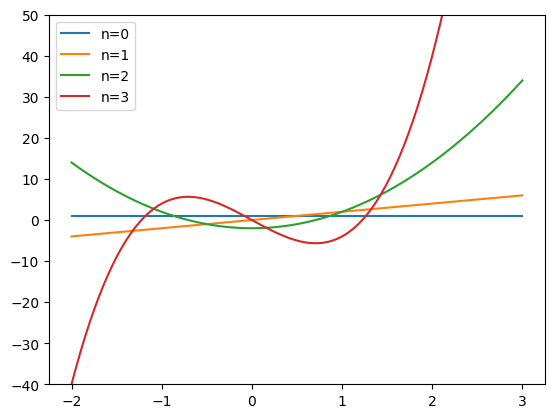

In [12]:
# hermite
def H(n, x):
    if n == 0:
        return np.full(len(x), 1)  # 回傳全部都是1的array
    elif n == 1:
        return 2 * x  # 回傳x
    else:
        return 2 * x * H(n - 1, x) - 2 * (n - 1) * H(n - 2, x)  # 回傳遞迴後的結果


x = np.linspace(-2, 3, 100)  # x是在-2~3之間100個數組成的array
lim = (0, 4)  # 要顯示的n的範圍
splits = False  # 是否要將圖分開顯示
for n in range(*lim):
    plt.ylim(-40, 50)  # 設定邊界
    y = H(n, x)  # 以x計算y
    plt.plot(x, y, label=f"n={n}")  # 畫到畫布上
    plt.legend()  # 圖例
    if splits:
        plt.show()  # 給使用者看
if not splits:
    plt.ylim(-40, 50)  # 設定邊界
    plt.show()  # 給使用者看

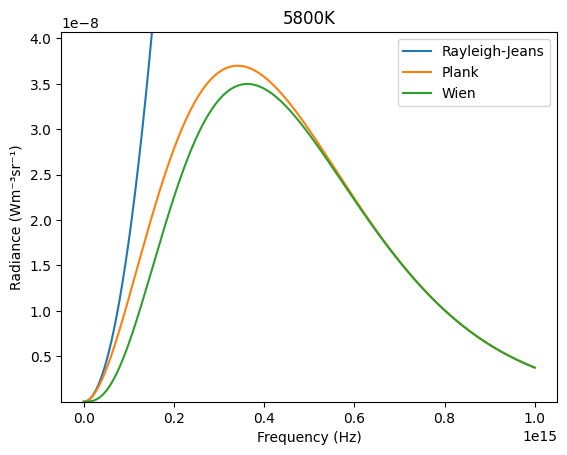

In [20]:
# 輻射強度, 以頻率為基本
c = 299792458
k = 1.38064852e-23
h = 6.626069934e-34


# 定義函數
def RJ(v, T=5800):
    """Rayleigh-Jeans law"""
    return 2 * v ** 2 * k * T / c ** 2


def Planck(v, T=5800):
    """Planck's law"""
    return 2 * h * v ** 3 / c ** 2 / (np.exp(h * v / (k * T)) - 1)


def Wien(v, T=5800):
    """Wien's displacement law"""
    return 2 * h * v ** 3 / c ** 2 * np.exp(-h * v / (k * T))


# 設定頻率範圍與黑體溫度
x = np.linspace(1e10, 1e15, 1000)  # Hz
T = 5800  # K

# 設定標題
plt.title(f"{T}K")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Radiance (Wm⁻³sr⁻¹)")

# 計算每個law的結果
pl = Planck(x, T)
rj = RJ(x, T)
wi = Wien(x, T)

# 設定最高不要超過planck的最高*1.1
plt.ylim(np.min(pl), np.max(pl) * 1.1)

# 統一畫出來
plt.plot(x, rj, label="Rayleigh-Jeans")
plt.plot(x, pl, label="Plank")
plt.plot(x, wi, label="Wien")

plt.legend()  # 圖例
plt.show()  # 給使用者看

C:\Users\Tom\AppData\Local\Temp\ipykernel_7184\1855169834.py:15: RuntimeWarning: overflow encountered in exp
  return 2 * h * c ** 2 / l ** 5 / (np.exp(h * c / (l * k * T)) - 1)


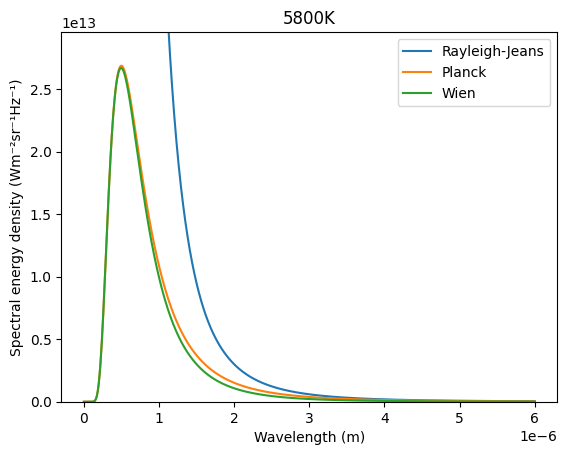

In [25]:
# 輻射強度, 以波長為基本
c = 299792458
k = 1.38064852e-23
h = 6.626069934e-34


# 定義函數
def RJ(l, T=5800):
    """Rayleigh-Jeans law"""
    return 2 * c * k * T / l ** 4


def Planck(l, T=5800):
    """Planck's law"""
    return 2 * h * c ** 2 / l ** 5 / (np.exp(h * c / (l * k * T)) - 1)


def Wien(l, T=5800):
    """Wien's displacement law"""
    return 2 * h * c ** 2 / l ** 5 * np.exp(-h * c / (l * k * T))


# 設定波長範圍與黑體溫度
x = np.linspace(1e-10, 6e-6, 1000)  # m
T = 5800  # K

# 設定標題
plt.title(f"{T}K")
plt.xlabel("Wavelength (m)")
plt.ylabel("Spectral energy density (Wm⁻²sr⁻¹Hz⁻¹)")

# 計算每個law的結果
pl = Planck(x, T)
rj = RJ(x, T)
wi = Wien(x, T)

# 設定最高不要超過planck的最高*1.1
plt.ylim(np.min(pl), np.max(pl) * 1.1)

# 統一畫出來
plt.plot(x, rj, label="Rayleigh-Jeans")
plt.plot(x, pl, label="Planck")
plt.plot(x, wi, label="Wien")

plt.legend()  # 圖例
plt.show()  # 給使用者看